<a href="https://colab.research.google.com/github/juanes2855/KDD/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PEC 1 20232**


Extensión de NumPy para manejar y  análizar datos, apoyandose en el concepto de dataframe

Integrantes:

             Julian Andres Masso Lopez
             John Fredy Muñoz Diaz
             Jhon Edison Vargas
             Juan Esteban Henao Ramírez

Descargue el siguiente dataset:
https://archive.ics.uci.edu/ml/datasets/adult

**1. Complete el diccionario de datos (en tipo poner entero, real, binominal polinominal)**




In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
# se importa numpy
import numpy  as np
# libreria para graficar
import matplotlib.pyplot as plt
pd.__version__
# si hay una versión antigua se actualiza
#!python -m pip install pandas==1.3.5

'1.5.3'

In [98]:
#Lectura de archivo
df = pd.read_csv('/content/sample_data/kdd/adult.data')

#Cambio de nombre de encabezados
df.columns = [
'age',
'workclass'         ,
'fnlwgt' ,
'education'            ,
'education-num',
'marital-status'            ,
'occupation' ,
'relationship' ,
'race'         ,
'sex' ,
'capital-gain'           ,
'capital-loss'  ,
'hours-per-week'   ,
'native-country'    ,
'income'    ]

#print(df.isin([' ?']).sum(axis=0))
df['workclass'] = df['workclass'].replace(' ?', np.nan)
df['occupation'] = df['occupation'].replace(' ?', np.nan)
df['native-country'] = df['native-country'].replace(' ?', np.nan)


#Cambio de tipos de datos
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['sex'] = df['sex'].astype('category')
df['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['native-country'] = df['native-country'].astype('category')
df['income'] = df['income'].astype('category')

#print (df.dtypes)
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [84]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Identifique si hay columnas con más del 30% de valores faltantes.**

In [99]:
for col in df.columns:
  if df[col].isna().sum() != 0:
    print(f"La columna {col} tiene {df[col].isna().sum()} valores vacíos.")
    print(f"Porcentaje faltante {round((df[col].isna().sum() / len(df[col]))*100 , 3)}%")

La columna workclass tiene 1836 valores vacíos.
Porcentaje faltante 5.639%
La columna occupation tiene 1843 valores vacíos.
Porcentaje faltante 5.66%
La columna native-country tiene 583 valores vacíos.
Porcentaje faltante 1.791%


Por lo tanto no hay columnas con mas del 30% de datos faltantes

In [74]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


**Cambio de datos Nan**

In [100]:
df.iloc[805]

age                                   50
workclass                            NaN
fnlwgt                             23780
education                        Masters
education-num                         14
marital-status     Married-spouse-absent
occupation                           NaN
relationship              Other-relative
race                               White
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
income                             <=50K
Name: 805, dtype: object

In [104]:
df2 = df.copy()
df2['occupation'].fillna(df2['occupation'].mode()[0], inplace=True)
df2['workclass'].fillna(df2['workclass'].mode()[0], inplace=True)
df2['native-country'].fillna(df2['native-country'].mode()[0], inplace=True)
for col in df2.columns:
  if df2[col].isna().sum() != 0:
    print(f"La columna {col} tiene {df2[col].isna().sum()} valores vacíos.")
    print(f"Porcentaje faltante {round((df2[col].isna().sum() / len(df2[col]))*100 , 3)}%")

In [105]:
df2.iloc[805]

age                                   50
workclass                        Private
fnlwgt                             23780
education                        Masters
education-num                         14
marital-status     Married-spouse-absent
occupation                Prof-specialty
relationship              Other-relative
race                               White
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
income                             <=50K
Name: 805, dtype: object

**Adecuación de datos**

In [114]:
df2['native-country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [116]:
df2['workclass'] = df2['workclass'].map({' Self-emp-not-inc': 0,
                                            ' Self-emp-inc': 1,
                                            ' Local-gov': 2,
                                            ' State-gov': 3,
                                            ' Federal-gov': 4,
                                            ' Private': 5,
                                            ' Without-pay': 6,
                                            ' Never-worked': 7,})

df2['education'] = df2['education'].map({' Preschool': 0,
                                            ' 1st-4th': 1,
                                            ' 5th-6th': 2,
                                            ' 7th-8th': 3,
                                            ' 9th': 4,
                                            ' 10th': 5,
                                            ' 11th': 6,
                                            ' 12th': 7,
                                            ' HS-grad': 8,
                                            ' Some-college': 9,
                                            ' Assoc-acdm': 10,
                                            ' Assoc-voc': 11,
                                            ' Bachelors': 12,
                                            ' Masters': 13,
                                            ' Doctorate': 14,
                                            ' Prof-school': 15})

df2['marital-status'] = df2['marital-status'].map({' Never-married': 0,
                                                      ' Married-civ-spouse': 1,
                                                      ' Married-AF-spouse': 2,
                                                      ' Married-spouse-absent': 3,
                                                      ' Divorced': 4,
                                                      ' Separated': 5,
                                                      ' Widowed': 6})

df2['occupation'] = df2['occupation'].map({' Exec-managerial': 0,
                                              ' Handlers-cleaners': 1,
                                              ' Prof-specialty': 2,
                                              ' Other-service': 3,
                                              ' Adm-clerical': 4,
                                              ' Sales': 5,
                                              ' Transport-moving': 6,
                                              ' Farming-fishing': 7,
                                              ' Machine-op-inspct': 8,
                                              ' Tech-support': 9,
                                              ' Craft-repair': 10,
                                              ' Protective-serv': 11,
                                              ' Armed-Forces': 12,
                                              ' Priv-house-serv': 13})

df2['relationship'] = df2['relationship'].map({' Husband': 0,
                                                  ' Not-in-family': 1,
                                                  ' Wife': 2,
                                                  ' Own-child': 3,
                                                  ' Unmarried': 4,
                                                  ' Other-relative': 5})

df2['race'] = df2['race'].map({' White': 0, ' Black': 1,
                                  ' Asian-Pac-Islander': 2,
                                  ' Amer-Indian-Eskimo': 3,
                                  ' Other': 4})
df2['native-country'] = df2['native-country'].map({ ' United-States': 0,
                                            ' Cambodia': 1,
                                            ' England': 2,
                                            ' Puerto-Rico': 3,
                                            ' Canada': 4,
                                            ' Outlying-US(Guam-USVI-etc)': 5,
                                            ' India': 6,
                                            ' Japan': 7,
                                            ' Greece': 8,
                                            ' South': 9,
                                            ' China': 10,
                                            ' Cuba': 11,
                                            ' Iran': 12,
                                            ' Honduras': 13,
                                            ' Philippines': 14,
                                            ' Italy': 15,
                                            ' Poland': 16,
                                            ' Jamaica': 17,
                                            ' Vietnam': 18,
                                            ' Mexico': 19,
                                            ' Portugal': 20,
                                            ' Ireland': 21,
                                            ' France': 22,
                                            ' Dominican-Republic': 23,
                                            ' Laos': 24,
                                            ' Taiwan': 25,
                                            ' Haiti': 26,
                                            ' Columbia': 27,
                                            ' Hungary': 28,
                                            ' Guatemala': 29,
                                            ' Nicaragua': 30,
                                            ' Scotland': 31,
                                            ' Thailand': 32,
                                            ' Yugoslavia': 33,
                                            ' El-Salvador': 34,
                                            ' Trinadad&Tobago': 35,
                                            ' Peru': 36,
                                            ' Hong': 37,
                                            ' Germany': 38,
                                            ' Ecuador': 39,
                                            ' Holand-Netherlands': 40})
df2['sex'] = df2['sex'].map({' Male': 0, ' Female': 1})
df2['income'] = df2['income'].map({' <=50K': 0, ' >50K': 1})

In [117]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,NaN,83311,NaN,13,1,0,0,0,0,0,0,13,0,0
1,38,NaN,215646,NaN,9,4,1,1,0,0,0,0,40,0,0
2,53,NaN,234721,NaN,7,1,1,0,1,0,0,0,40,0,0
3,28,NaN,338409,NaN,13,1,2,2,1,1,0,0,40,11,0
4,37,NaN,284582,NaN,14,1,0,2,0,1,0,0,40,0,0


In [111]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**4. Construya un gráfico de cajas y bigotes para 2 variables numéricas, en relación con clase.  Concluya al respecto.**

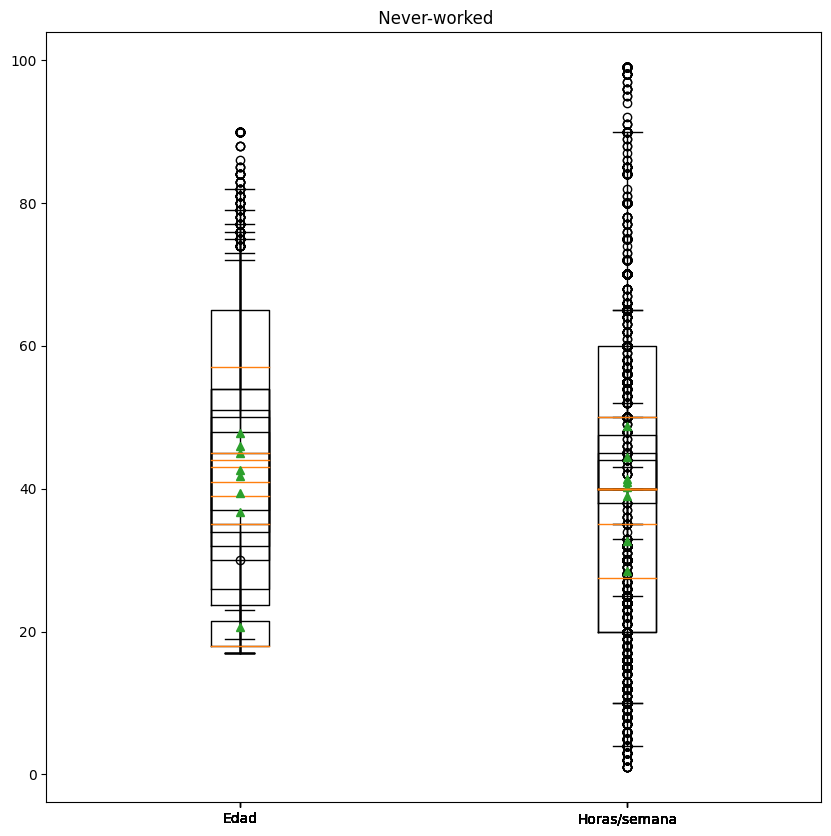

In [69]:
plt.figure(figsize=(10, 10))

for workclass in df['workclass'].unique():
    subset = df.loc[df['workclass'] == workclass]
    plt.boxplot([subset['age'], subset['hours-per-week']], labels=["Edad", "Horas/semana"], showmeans=True)
    plt.title(workclass)

plt.show()